In [42]:
import pandas as pd
import yfinance as yf
from pyspark.sql.types import *
from pyspark.sql.functions import *
import datetime
import matplotlib.pyplot as plt
stocks = "BTC-USD"
start = datetime.datetime(2021,2,5)
end = datetime.datetime(2023,1,9)
df = yf.download(stocks, start=start, end=end)
df.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])

[*********************100%***********************]  1 of 1 completed
C:\Users\Parth\AppData\Local\Temp\ipykernel_1412\3200314123.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])


Price,Date,Ticker,Close,High,Low,Open,Volume
0,2021-02-05,BTC-USD,38144.308594,38225.906250,36658.761719,36931.546875,58598066402
1,2021-02-06,BTC-USD,39266.011719,40846.546875,38138.386719,38138.386719,71326033653
2,2021-02-07,BTC-USD,38903.441406,39621.835938,37446.152344,39250.191406,65500641143
3,2021-02-08,BTC-USD,46196.464844,46203.929688,38076.324219,38886.828125,101467222687
4,2021-02-09,BTC-USD,46481.105469,48003.722656,45166.960938,46184.992188,91809846886
...,...,...,...,...,...,...,...
698,2023-01-04,BTC-USD,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
699,2023-01-05,BTC-USD,16836.736328,16884.021484,16790.283203,16863.472656,13692758566
700,2023-01-06,BTC-USD,16951.968750,16991.994141,16716.421875,16836.472656,14413662913
701,2023-01-07,BTC-USD,16955.078125,16975.017578,16914.191406,16952.117188,7714767174


In [34]:
date = df.drop(['Close','High','Low','Open','Volume'],axis =1)
date

Date
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
...
2023-01-04
2023-01-05
2023-01-06
2023-01-07


In [38]:
date.to_csv('Date.csv')

In [44]:
df['Close'].head(10)

Ticker,BTC-USD
Date,
2021-02-05,38144.308594
2021-02-06,39266.011719
2021-02-07,38903.441406
2021-02-08,46196.464844
2021-02-09,46481.105469
2021-02-10,44918.183594
2021-02-11,47909.332031
2021-02-12,47504.851562
2021-02-13,47105.515625


In [46]:
df.shape

(703, 5)

In [48]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,703.000000,703.000000,703.000000,703.000000,7.030000e+02
mean,37724.459798,38667.198013,36697.640547,37757.848284,3.678233e+10
std,14283.442624,14658.354122,13833.965780,14269.137013,2.052316e+10
min,15787.284180,16253.047852,15599.046875,15782.300781,7.714767e+09
25%,21988.024414,22661.470703,21309.547852,22284.105469,2.556487e+10
50%,39208.765625,40081.679688,38076.324219,39213.082031,3.247905e+10
75%,48239.158203,49441.175781,46965.146484,48324.304688,4.273688e+10
max,67566.828125,68789.625000,66382.062500,67549.734375,3.509679e+11


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 703 entries, 2021-02-05 to 2023-01-08
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   703 non-null    float64
 1   (High, BTC-USD)    703 non-null    float64
 2   (Low, BTC-USD)     703 non-null    float64
 3   (Open, BTC-USD)    703 non-null    float64
 4   (Volume, BTC-USD)  703 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 33.0 KB


In [52]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [54]:
print('NA values:',df.isnull().values.any())

NA values: False


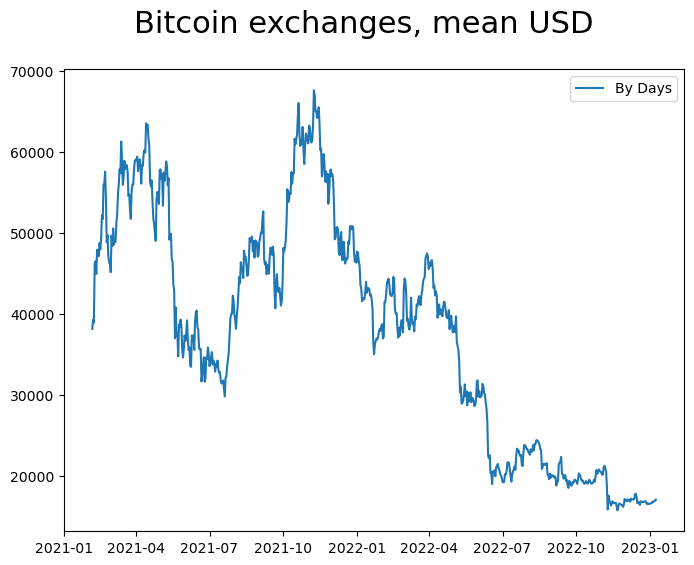

In [56]:
fig = plt.figure(figsize=[8, 6])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.plot(df['Close'], '-', label='By Days')
plt.legend()

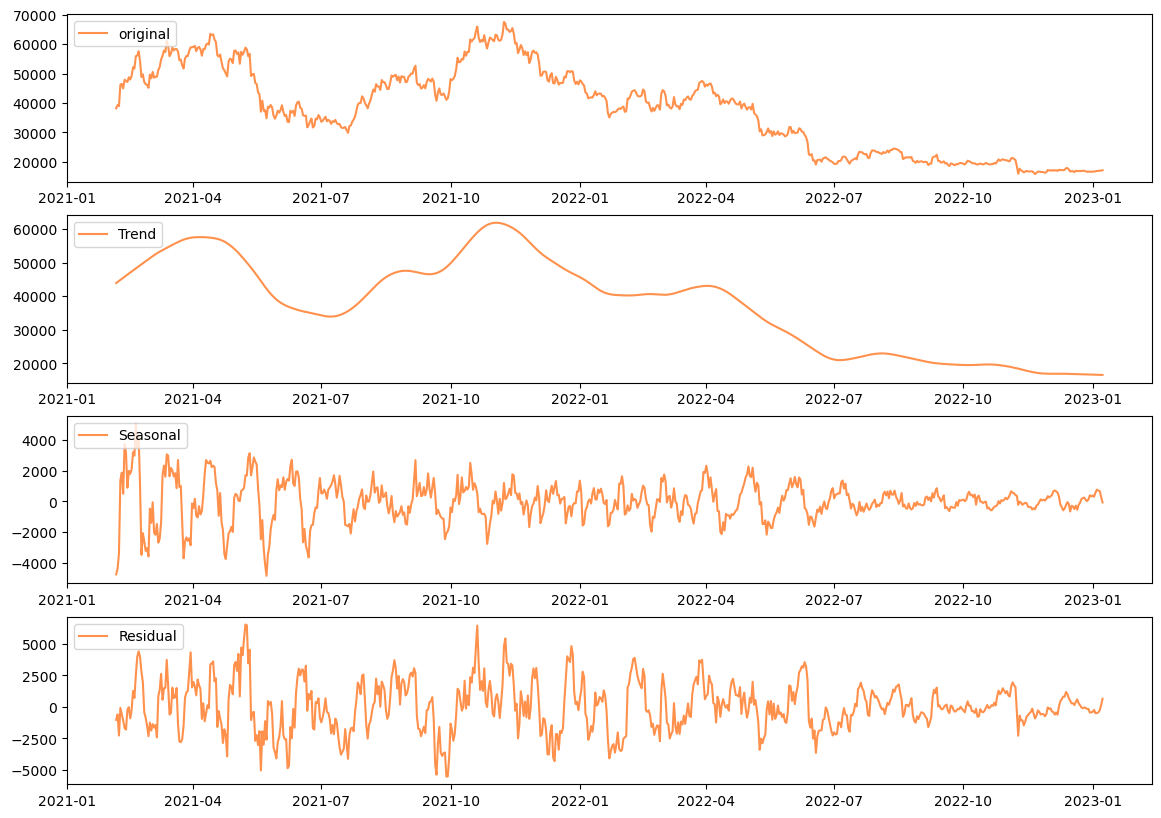

In [58]:
from statsmodels.tsa.seasonal import STL


#performing stl decomposition 
stl = STL(df['Close'],period = 30)
result =stl.fit()

#plotting the decompositon components
plt.figure(figsize =(14,10))
plt.subplot(411)
plt.plot(result.observed, label ='original', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(result.trend, label ='Trend', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(result.seasonal, label ='Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label ='Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.show()

In [118]:
# as we have data for a year a only that is why we full check fo weak stationarity only.
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['Close'])

print('ADF TEST RESULTS:')

adf_results = pd .DataFrame(adf)

print(f'p-value: {adf_results[0][1]}')
adf_results

ADF TEST RESULTS:
p-value: 0.8820405872645181


,0
0,-0.549257
1,0.882041
2,2
3,362
4,"{'1%': -3.448544133483233, '5%': -2.8695574079..."
5,5954.421263


AS THE P-VALUE IS GREATER THAN 0.05 SO THE GIVEN TIME SERIES IS NOT STATIONARY SO WE WILL CONVERT IT USING REGULAR DIFFERENCING

In [129]:
prices = df['Close']
diff_prices = prices.diff().dropna()

diff_prices 

Ticker,BTC-USD
Date,
2021-10-03,488.464844
2021-10-04,912.949219
2021-10-05,2401.910156
2021-10-06,3846.636719
2021-10-07,-1555.464844
...,...
2022-09-27,-112.125000
2022-09-28,316.173828
2022-09-29,146.330078


In [131]:
adf_diff = adfuller(diff_prices)
print('ADF DIFF TEST RESULTS:')

adf_diff_results = pd.DataFrame(adf_diff)

print(f'p-value: {adf_diff_results[0][1]}')
adf_diff_results

ADF DIFF TEST RESULTS:
p-value: 1.1068217628552555e-26


,0
0,-14.329308
1,0.0
2,1
3,362
4,"{'1%': -3.448544133483233, '5%': -2.8695574079..."
5,5936.466194


In [133]:
 1.1068217628552555e-26<0.05

True

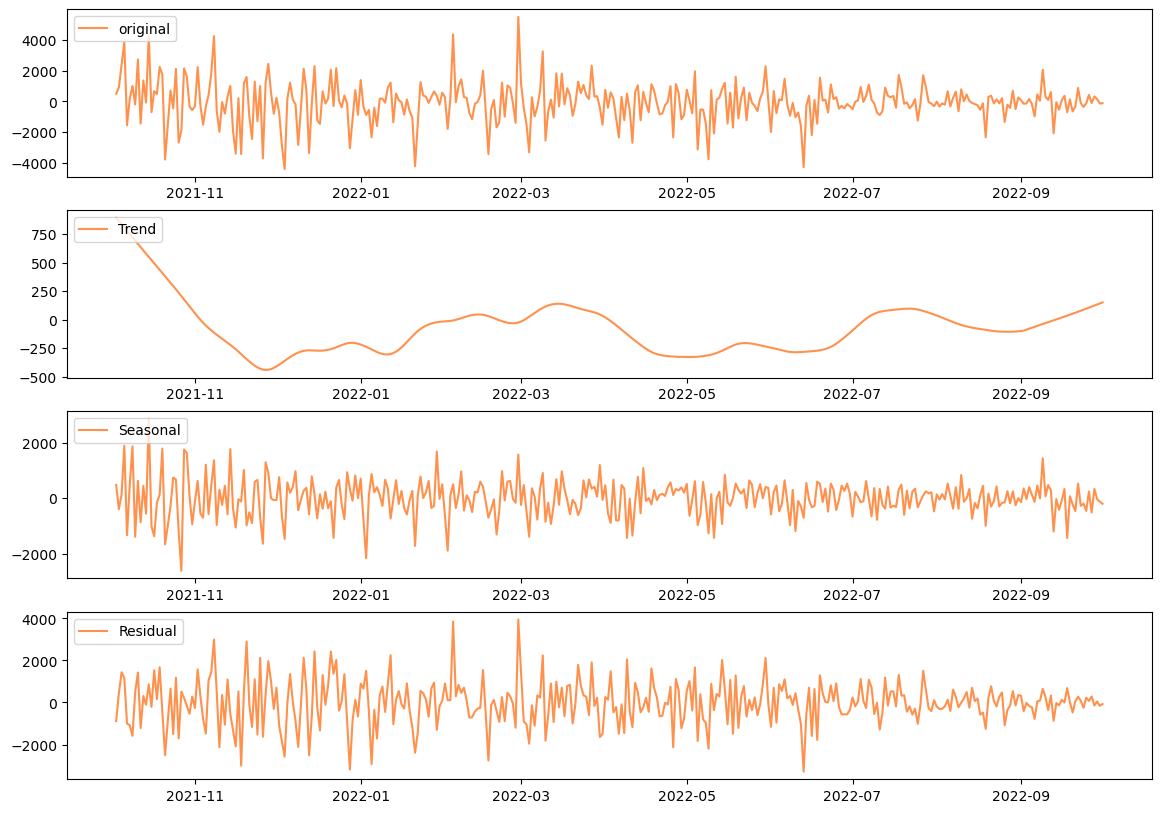

In [135]:
#performing stl decomposition 
stl = STL(diff_prices,period = 30)
result =stl.fit()

#plotting the decompositon components
plt.figure(figsize =(14,10))
plt.subplot(411)
plt.plot(result.observed, label ='original', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(412)
plt.plot(result.trend, label ='Trend', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(413)
plt.plot(result.seasonal, label ='Seasonal', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.subplot(414)
plt.plot(result.resid, label ='Residual', color = '#FF914D')
plt.legend(loc = 'upper left')
plt.show()

now the time series is stationary.

In [ ]:
data =dfb
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Prepare dataset for LSTM
X, y = [], []
window_size = 30  # Number of previous days to consider

for i in range(len(data_scaled) - window_size):
    X.append(data_scaled[i:i+window_size])
    y.append(data_scaled[i+window_size, 0])  # Predicting Bitcoin closing price

X, y = np.array(X), np.array(y)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, X.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], data.shape[1] - 1)))))[:, 0]

# Save the model
model.save("bitcoin_sentiment_prediction.h5")

# Display results
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(btc_data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual Price")
plt.plot(btc_data.index[-len(predictions):], predictions, label="Predicted Price", linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()
